# Importing required libraries 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Importing data set

In [42]:
df =  pd.read_csv('ElectricCarData .csv')
df2 = pd.read_csv("EVStats.csv") 

# This dataset provides valuable insights into the specifications and characteristics of various electric vehicle models, which can be useful for comparing and analyzing different EV options

In [47]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


#### Brand: The brand or manufacturer of the electric vehicle.
#### Model: The model name or designation of the electric vehicle.
#### AccelSec: The time in seconds taken by the vehicle to accelerate from 0 to 100 km/h.
#### TopSpeed_KmH: The maximum speed in kilometers per hour that the vehicle can achieve.
#### Range_Km: The estimated range in kilometers that the vehicle can travel on a full charge.
#### Efficiency_WhKm: The energy efficiency of the vehicle, measured in watt-hours per kilometer.
#### FastCharge_KmH: The charging speed in kilometers per hour during fast charging sessions.
####  RapidCharge: Indicates whether the vehicle has the capability for rapid charging (Yes/No).
#### PowerTrain: The type of powertrain used in the vehicle (e.g., AWD, RWD).
#### PlugType: The type of plug used for charging the vehicle.
#### BodyStyle: The body style or design of the vehicle (e.g., Sedan, SUV, Hatchback).
#### Segment: The market segment classification of the vehicle (e.g., A, B, C).
#### Seats: The number of seats available in the vehicle.
#### PriceEuro: The price of the vehicle in Euros.

In [4]:
df.shape

(103, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [6]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [9]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


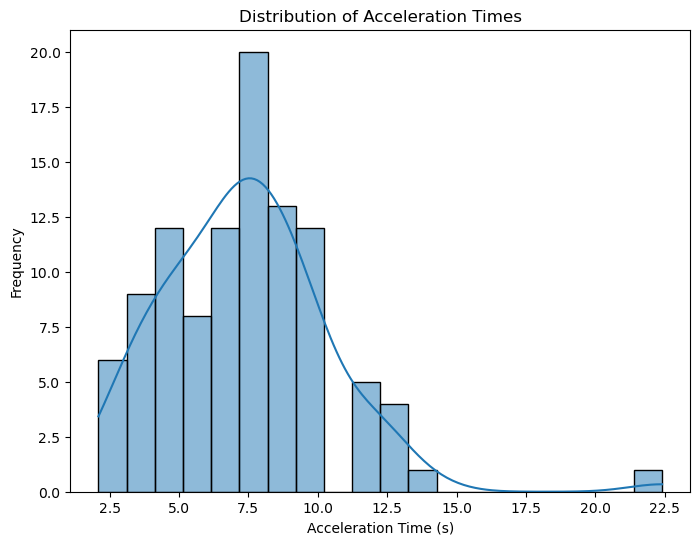

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AccelSec'], bins=20, kde=True)
plt.xlabel('Acceleration Time (s)')
plt.ylabel('Frequency')
plt.title('Distribution of Acceleration Times')
plt.show()

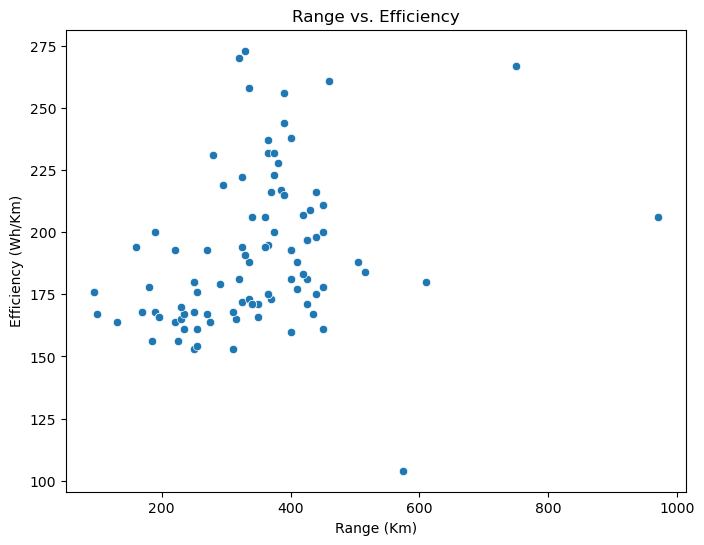

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Range_Km', y='Efficiency_WhKm', data=df)
plt.xlabel('Range (Km)')
plt.ylabel('Efficiency (Wh/Km)')
plt.title('Range vs. Efficiency')
plt.show()

efficiency of ev vehciles is highest for range 300 to 400 km

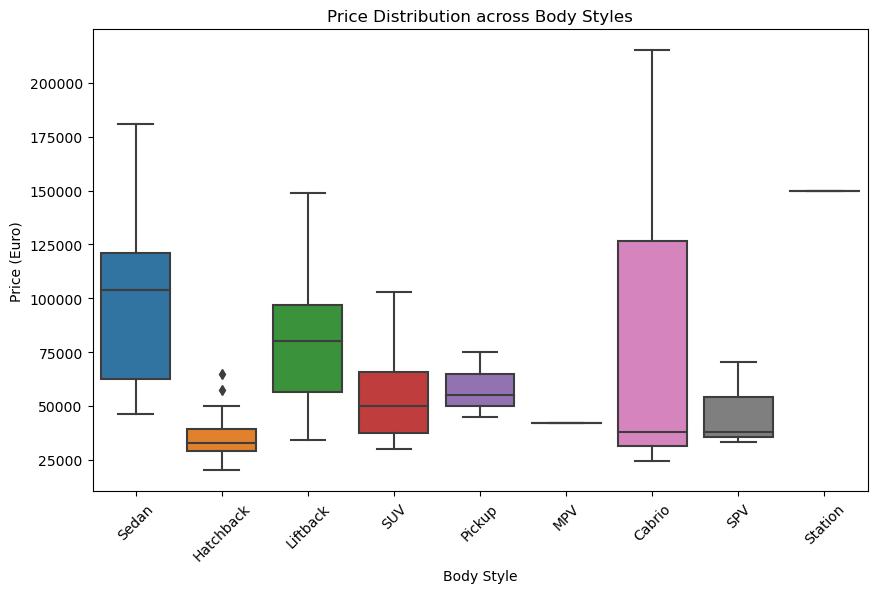

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BodyStyle', y='PriceEuro', data=df)
plt.xlabel('Body Style')
plt.ylabel('Price (Euro)')
plt.title('Price Distribution across Body Styles')
plt.xticks(rotation=45)
plt.show()

Price of cabiro body type is highest whereas hatchback bodytype has lowest price

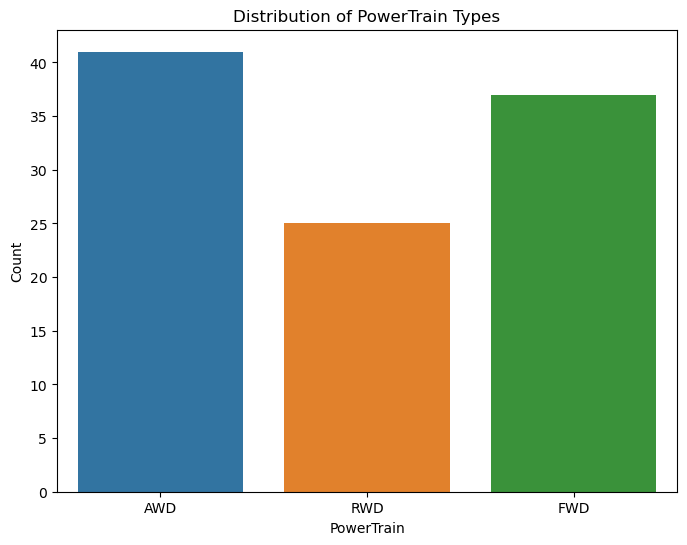

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PowerTrain', data=df)
plt.xlabel('PowerTrain')
plt.ylabel('Count')
plt.title('Distribution of PowerTrain Types')
plt.show()

There are less number of rear wheel drive ev cars 

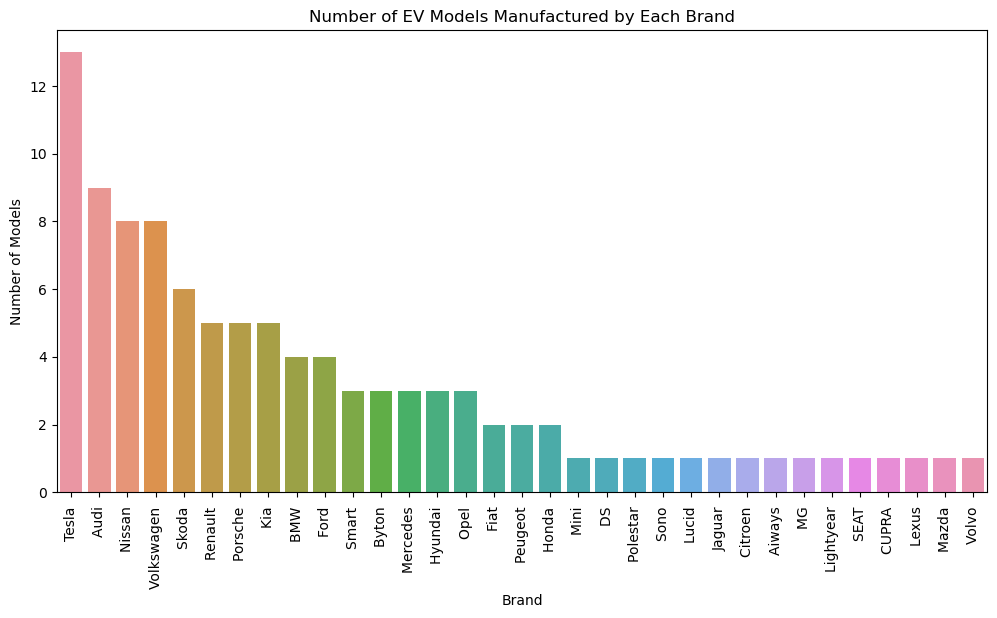

In [16]:
plt.figure(figsize=(12, 6))
brand_model_count = df['Brand'].value_counts()
sns.barplot(x=brand_model_count.index, y=brand_model_count.values)
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.title('Number of EV Models Manufactured by Each Brand')
plt.xticks(rotation=90)
plt.show()

Tesla has highest number of ev vehicles  followed by audi, nissan and volkswagen where as volvo has least number of ev vehicles 

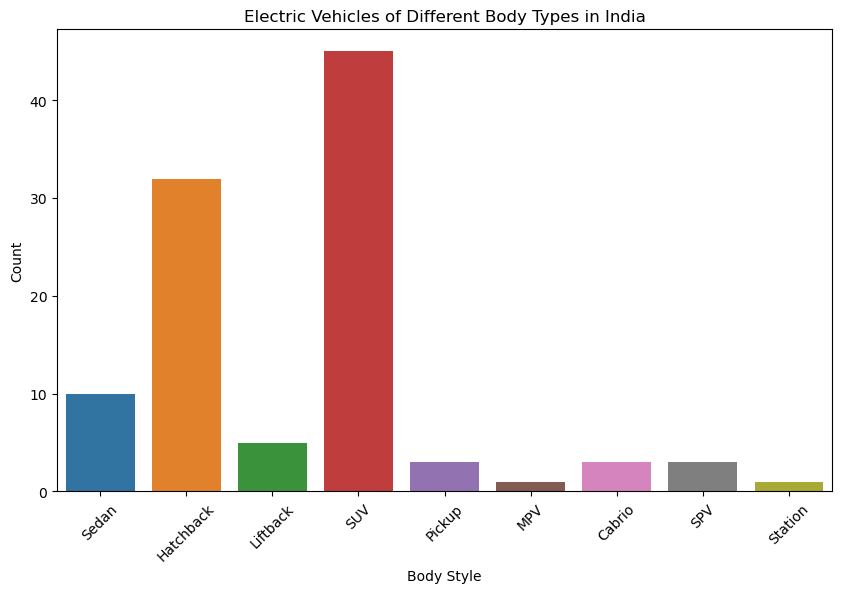

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BodyStyle', data=df)
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Electric Vehicles of Different Body Types in India')
plt.xticks(rotation=45)
plt.show()

SUV and hatchbak has most number of manufactured ev vehicles

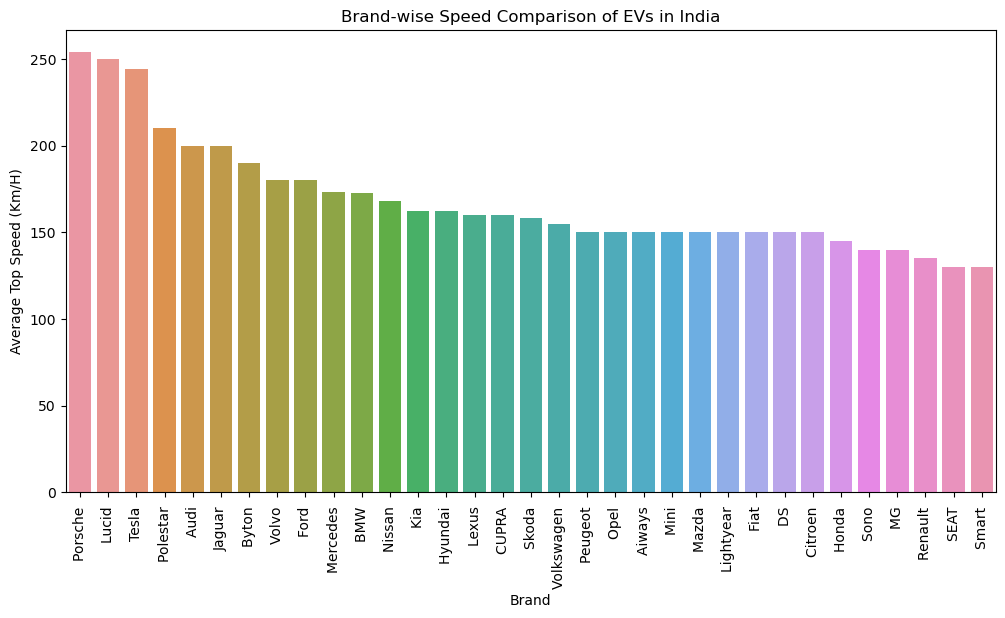

In [18]:
plt.figure(figsize=(12, 6))
brand_speed_comparison = df.groupby('Brand')['TopSpeed_KmH'].mean().sort_values(ascending=False)
sns.barplot(x=brand_speed_comparison.index, y=brand_speed_comparison.values)
plt.xlabel('Brand')
plt.ylabel('Average Top Speed (Km/H)')
plt.title('Brand-wise Speed Comparison of EVs in India')
plt.xticks(rotation=90)
plt.show()

Porsche has maximum top speed ev vehicles 

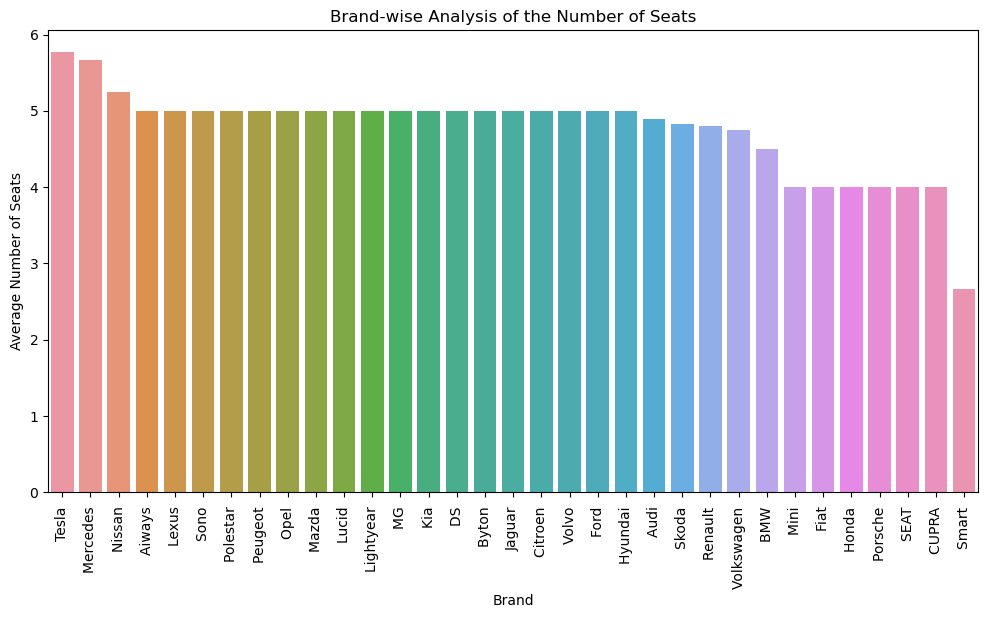

In [20]:
plt.figure(figsize=(12, 6))
brand_seats_analysis = df.groupby('Brand')['Seats'].mean().sort_values(ascending=False)
sns.barplot(x=brand_seats_analysis.index, y=brand_seats_analysis.values)
plt.xlabel('Brand')
plt.ylabel('Average Number of Seats')
plt.title('Brand-wise Analysis of the Number of Seats')
plt.xticks(rotation=90)
plt.show()

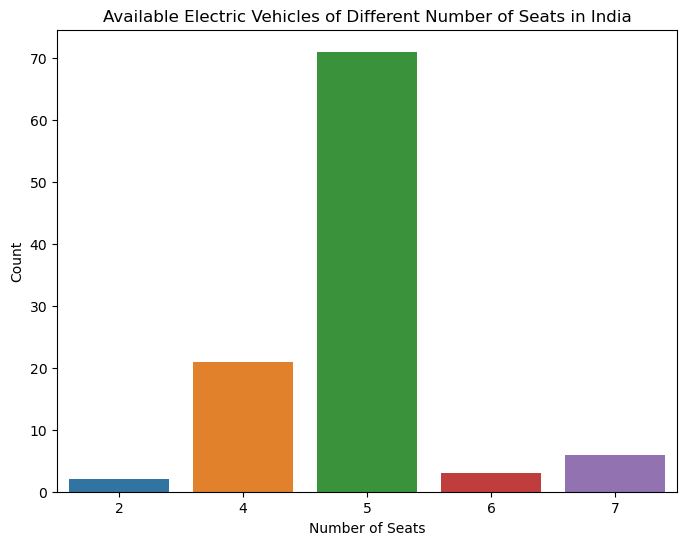

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Seats', data=df)
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.title('Available Electric Vehicles of Different Number of Seats in India')
plt.show()

5 seaters vehicles are manufactured the most

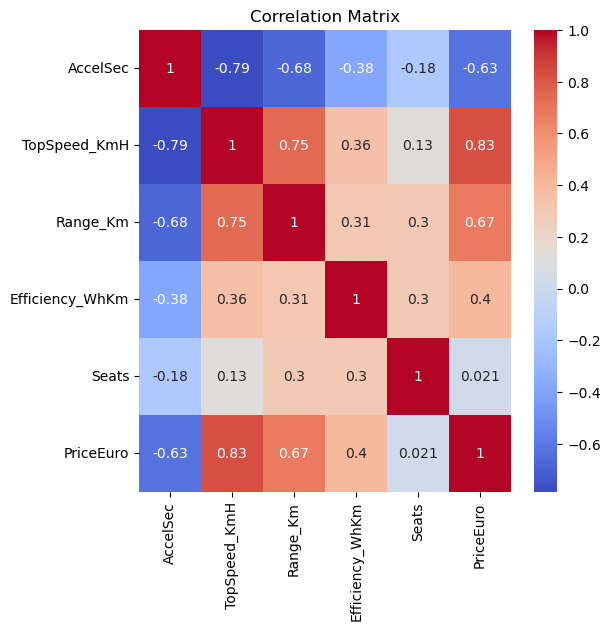

In [25]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
plt.figure(figsize=(6, 6))
sns.heatmap(data=numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


There is high corelation between topspeed and price of the vehicle

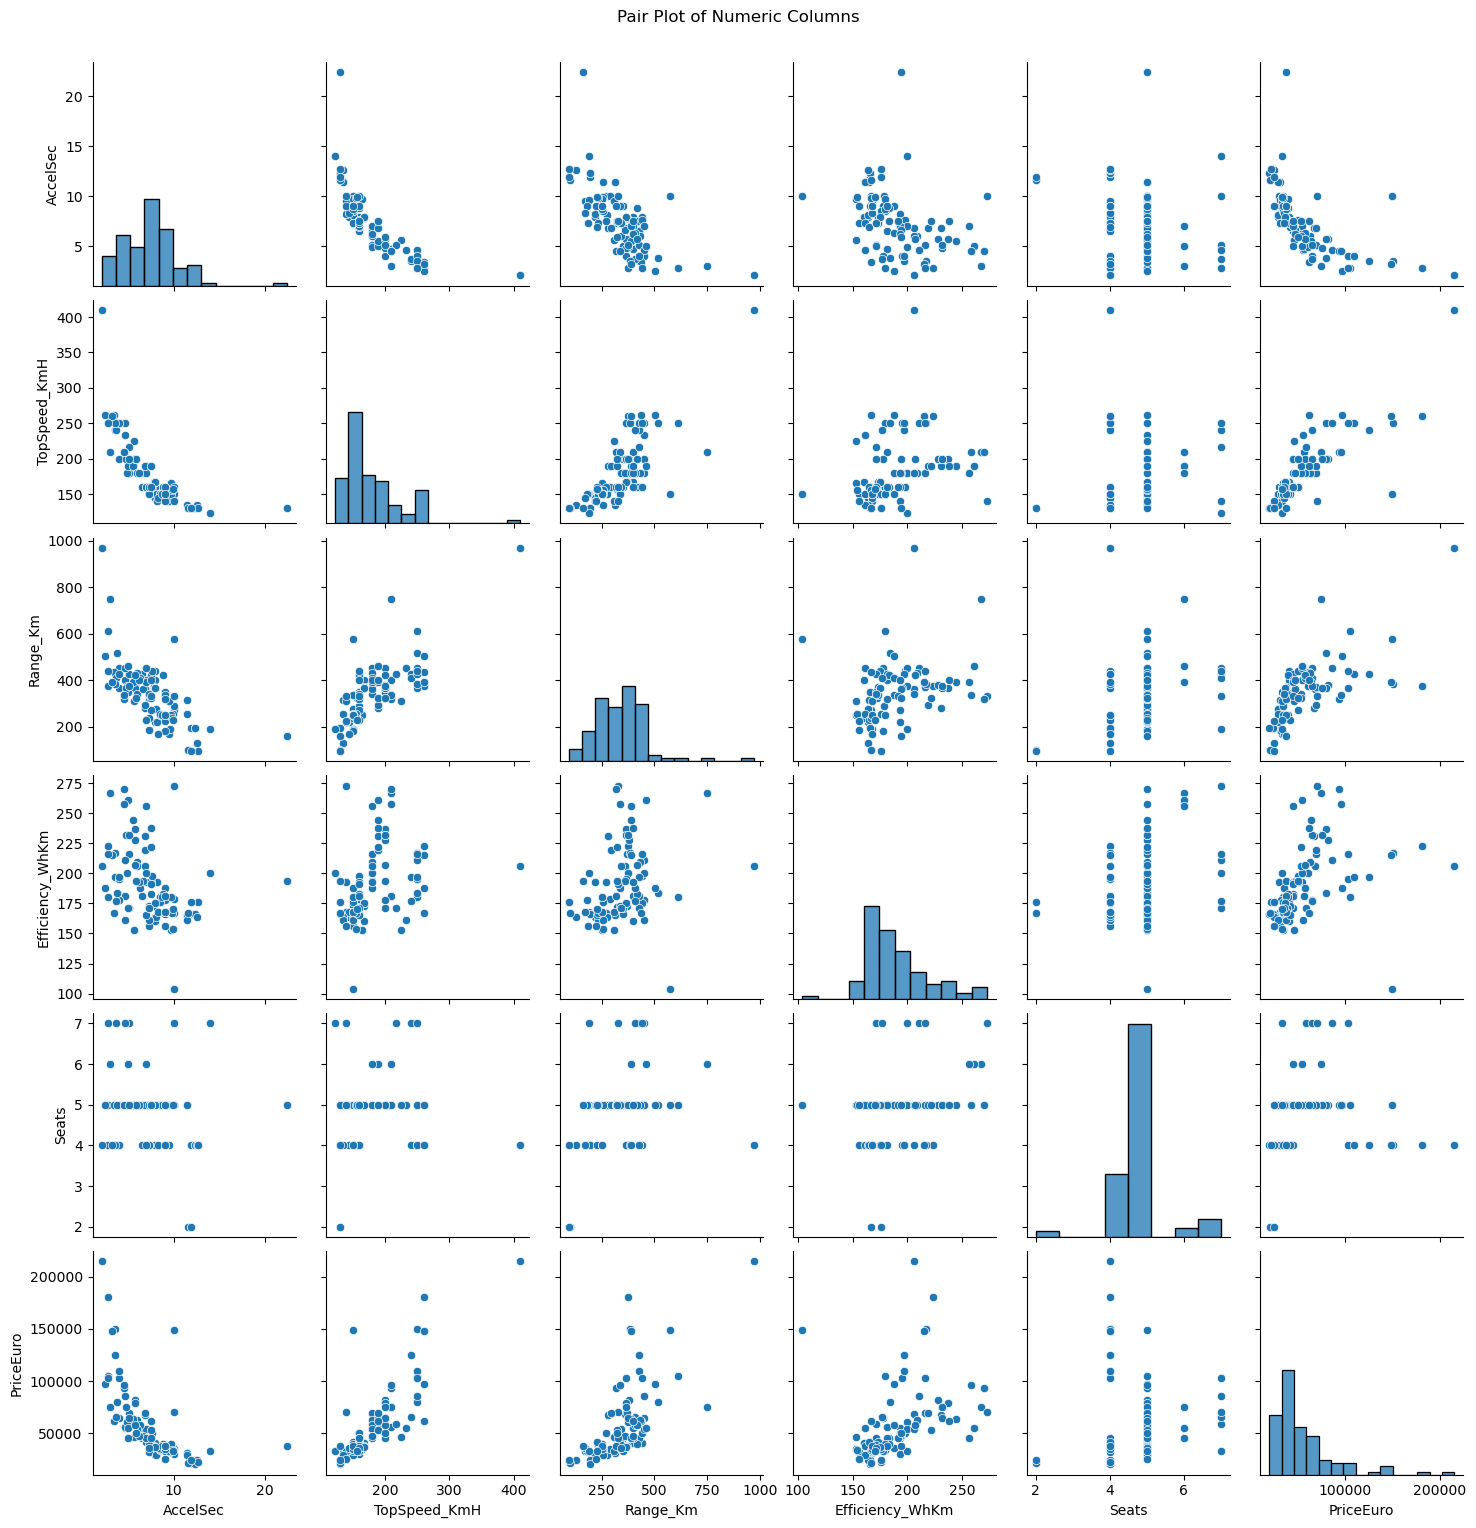

In [15]:
numeric_columns = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'Seats', 'PriceEuro']
sns.pairplot(df[numeric_columns])
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

In [27]:
selected_features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'Seats', 'PriceEuro']
X = df[selected_features]

AccelSec: This feature is chosen to capture the acceleration performance of electric vehicles. Acceleration is a key factor in determining the overall driving experience and can influence consumer preferences based on speed and responsiveness.

TopSpeed_KmH: The top speed of electric vehicles is included as it reflects the vehicle's potential for higher-speed journeys. This feature can help segment vehicles based on their suitability for different types of users, such as those who prioritize highway driving versus city commuting.

Range_Km: Range is a critical factor for electric vehicle buyers, as it directly impacts the practicality and usability of the vehicle. It is an essential feature for identifying different segments of buyers, such as those who prioritize long-range capabilities for road trips or shorter ranges for daily commutes.

Efficiency_WhKm: This feature quantifies the energy efficiency of electric vehicles. It's important for consumers looking to minimize energy consumption and operating costs. By clustering vehicles based on energy efficiency, we can identify segments of environmentally-conscious and cost-conscious buyers.

Seats: The number of seats directly relates to the vehicle's capacity to accommodate passengers. It can help segment vehicles for family use, individual commuting, or commercial purposes.

PriceEuro: Price is a crucial factor influencing purchasing decisions. Clustering based on price can identify different market segments with varying budget ranges and preferences.

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaling the data 

In [30]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

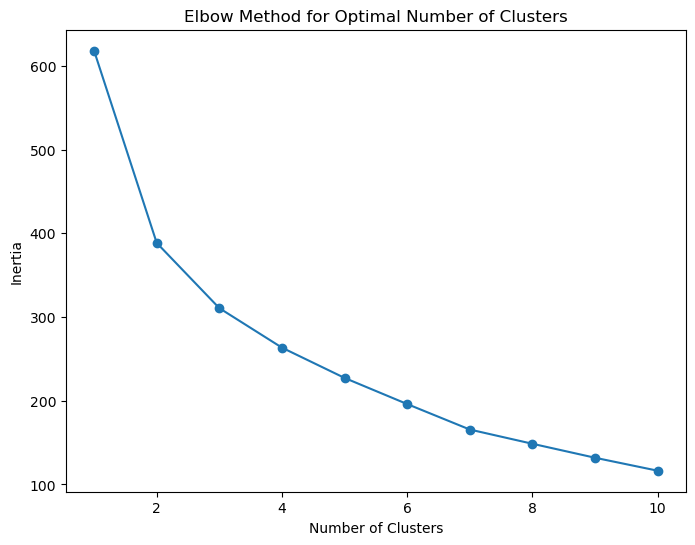

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

elbow point is at 3 so we select 3 number of clusters

In [32]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_scaled)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [33]:
df['Cluster'] = kmeans.labels_

In [34]:
cluster_summary = df.groupby('Cluster')[selected_features].mean()
print(cluster_summary)

         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm     Seats  \
Cluster                                                                  
0        9.350000    151.000000  264.907407       171.851852  4.666667   
1        3.800000    257.666667  497.916667       189.416667  4.416667   
2        5.710811    194.891892  395.000000       214.351351  5.351351   

             PriceEuro  
Cluster                 
0         34400.018519  
1        126982.416667  
2         63978.405405  


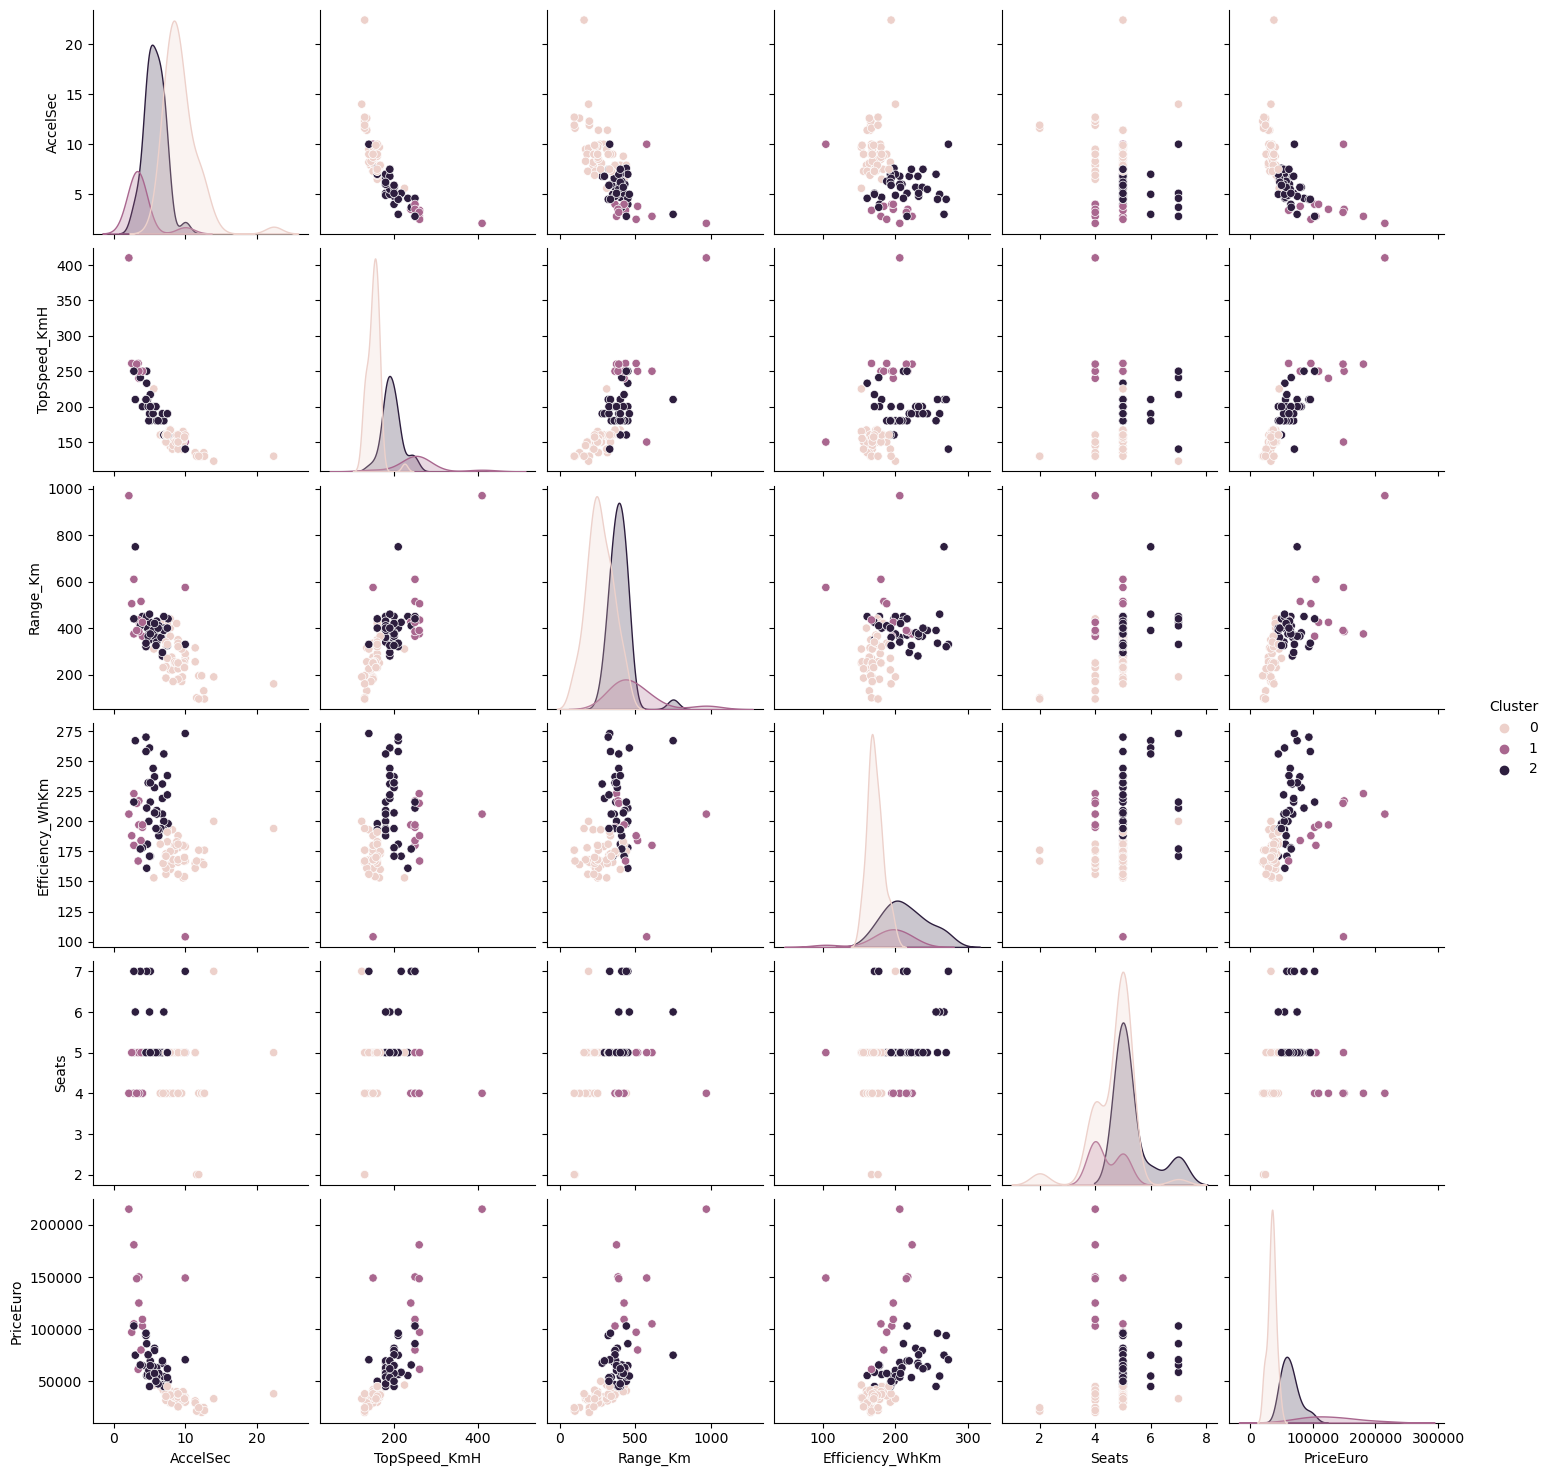

In [35]:
sns.pairplot(df, hue='Cluster', diag_kind='kde')
plt.show()

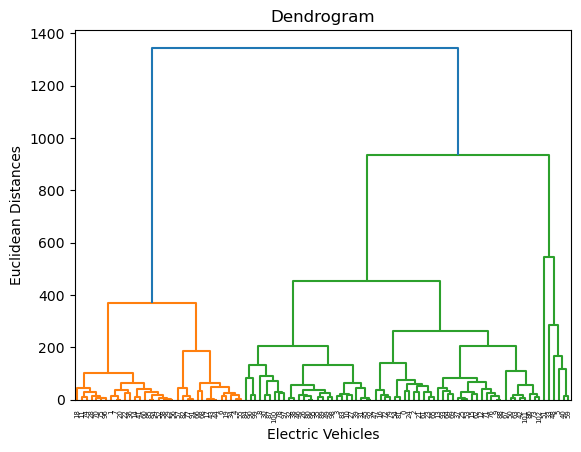

In [36]:
# Select the features you want to use for clustering
selected_features = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm']]

# Create a dendrogram using the selected features
dendrogram = sch.dendrogram(sch.linkage(selected_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Electric Vehicles')
plt.ylabel('Euclidean Distances')
plt.show()

through dendogram also we can select 3 number of clusters

In [37]:
# Mapping cluster labels to segments
cluster_segments = {
    0: 'Segment 1',
    1: 'Segment 2',
    2: 'Segment 3'
}

# Add 'Segment' column based on cluster labels
df['Segment'] = df['Cluster'].map(cluster_segments)


In [38]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Cluster
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,Segment 3,5,55480,2
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,Segment 1,5,30000,0
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,Segment 3,5,56440,2
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,Segment 3,5,68040,2
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,Segment 1,4,32997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,Segment 1,5,45000,0
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,Segment 3,5,96050,2
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,Segment 3,5,50000,2
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,Segment 3,5,65000,2


In [40]:
# Drop the 'Cluster' column from the DataFrame
df = df.drop('Cluster', axis=1)

# Display the updated DataFrame without the 'Cluster' column
print(df.head())


         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0       450              161            940         Yes        AWD   
1       270              167            250         Yes        RWD   
2       400              181            620         Yes        AWD   
3       360              206            560         Yes        RWD   
4       170              168            190         Yes        RWD   

     PlugType  BodyStyle    Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan  Segment 3      5      55480  
1  Type 2 CCS  Hatchback  Se

In [41]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,Segment 3,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,Segment 1,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,Segment 3,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,Segment 3,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,Segment 1,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,Segment 1,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,Segment 3,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,Segment 3,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,Segment 3,5,65000


# This is our final data where we segment the vehicles through k-means clustering 

## The segment represents
### segment 1: "Compact and Efficient"
### segment 2: "Luxury and Performance"
### segment 3: "Versatile SUVs"

# Geographical Analysis 

In [79]:
df2

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82
5,6,Himachal Pradesh,0,0,0,0,0,98,0,98
6,7,Jammu & Kashmir,2,76,152,0,0,208,0,438
7,8,Goa,0,0,0,0,0,513,1,514
8,9,Dadra and Nagar Haveli,4,0,9,0,0,803,0,816
9,10,Jharkhand,75,228,736,9,7,655,0,1710


In [80]:
df2.shape

(30, 10)

In [81]:
df2.info

<bound method DataFrame.info of     Sl. No                      State  \
0        1                  Meghalaya   
1        2                   Nagaland   
2        3                    Manipur   
3        4                    Tripura   
4        5  Andaman & Nicobar islands   
5        6           Himachal Pradesh   
6        7            Jammu & Kashmir   
7        8                        Goa   
8        9     Dadra and Nagar Haveli   
9       10                  Jharkhand   
10      11                      Assam   
11      12                 Chandigarh   
12      13                      Bihar   
13      14                     Odisha   
14      15                 Uttarkhand   
15      16               Chhattisgarh   
16      17             Madhya Pradesh   
17      18                     Punjab   
18      19                  Telangana   
19      20             Andhra Pradesh   
20      21                     Kerala   
21      22                  Karnataka   
22      23               

In [82]:
df2.describe

<bound method NDFrame.describe of     Sl. No                      State  \
0        1                  Meghalaya   
1        2                   Nagaland   
2        3                    Manipur   
3        4                    Tripura   
4        5  Andaman & Nicobar islands   
5        6           Himachal Pradesh   
6        7            Jammu & Kashmir   
7        8                        Goa   
8        9     Dadra and Nagar Haveli   
9       10                  Jharkhand   
10      11                      Assam   
11      12                 Chandigarh   
12      13                      Bihar   
13      14                     Odisha   
14      15                 Uttarkhand   
15      16               Chhattisgarh   
16      17             Madhya Pradesh   
17      18                     Punjab   
18      19                  Telangana   
19      20             Andhra Pradesh   
20      21                     Kerala   
21      22                  Karnataka   
22      23             

In [83]:
df2.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

In [84]:
df2.duplicated().sum()

0

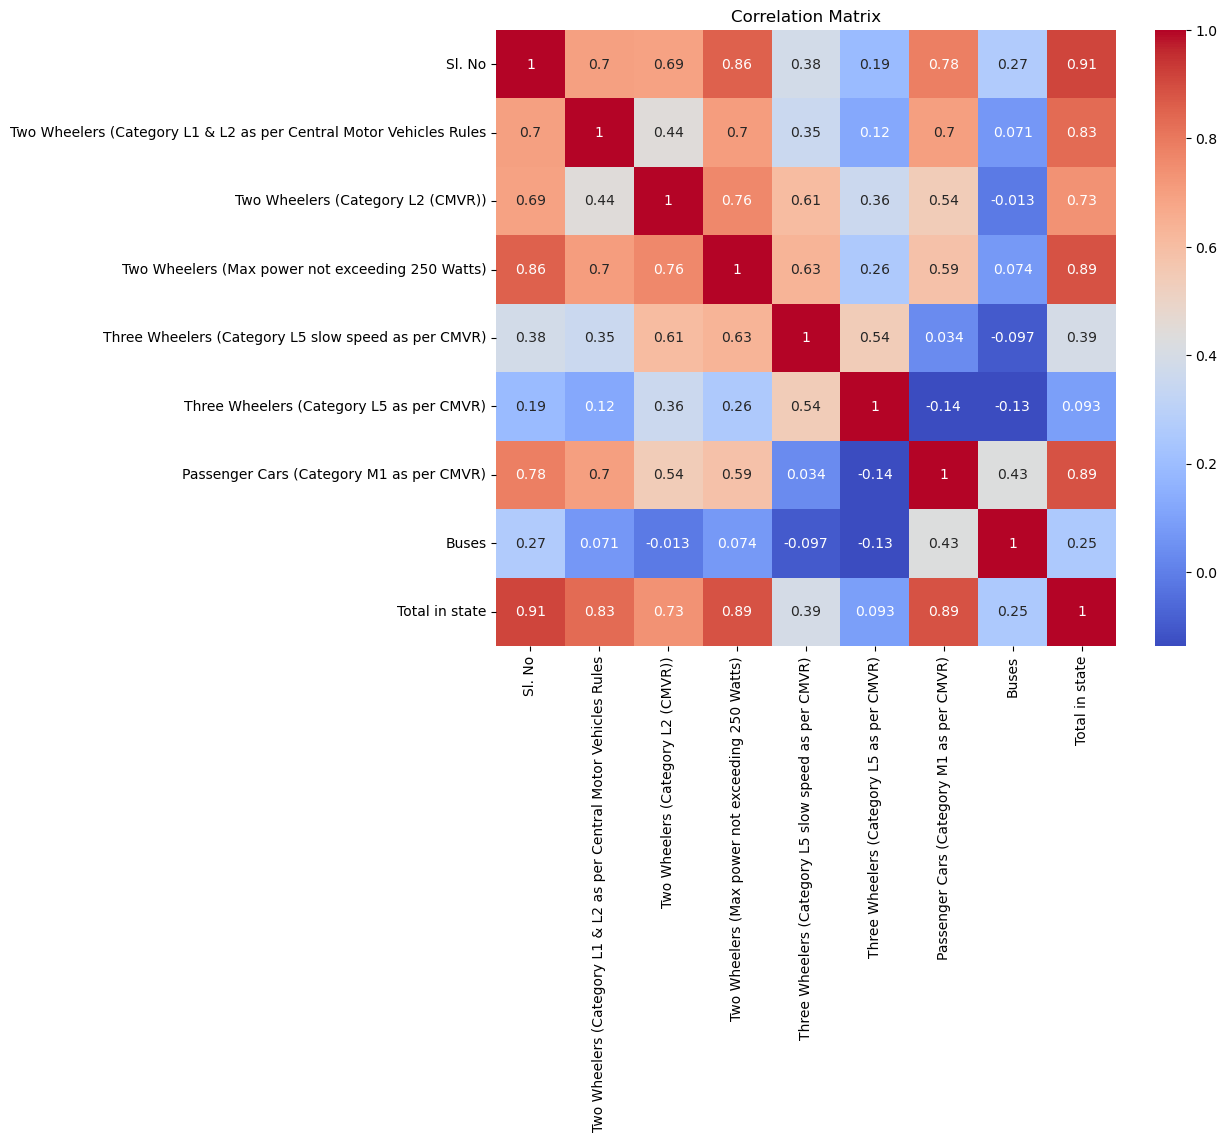

In [85]:
numeric_columns = df2.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

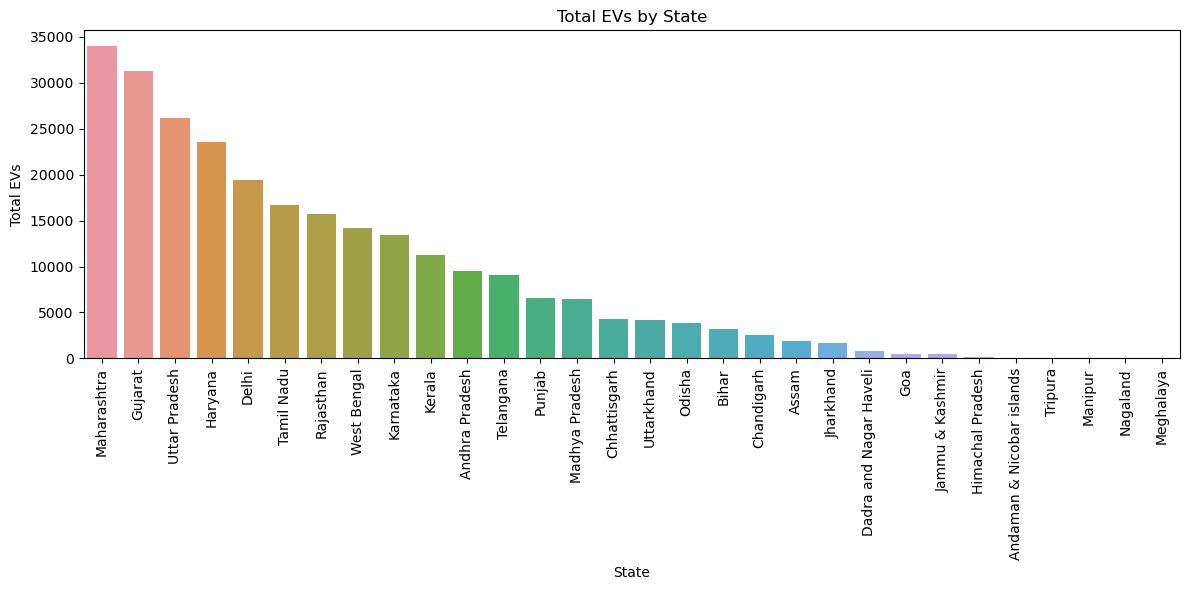

In [87]:
total_evs_by_state = df2.groupby('State')['Total in state'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_evs_by_state.index, y=total_evs_by_state.values)
plt.title('Total EVs by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total EVs')
plt.tight_layout()
plt.show()

In [88]:
# Find the most commonly used EV category
ev_category_columns = ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                       'Two Wheelers (Category L2 (CMVR))',
                       'Two Wheelers (Max power not exceeding 250 Watts)',
                       'Three Wheelers (Category L5 slow speed as per CMVR)',
                       'Three Wheelers (Category L5 as per CMVR)',
                       'Passenger Cars (Category M1 as per CMVR)', 'Buses']
df2['Most Common EV Category'] = df2[ev_category_columns].idxmax(axis=1)
most_common_ev_category = df2['Most Common EV Category'].value_counts().idxmax()

In [89]:
# Print the most commonly used EV category
print("Most Commonly Used EV Category:", most_common_ev_category)

Most Commonly Used EV Category: Passenger Cars (Category M1 as per CMVR)


In [90]:
# Find the dominant EV category in each state
ev_category_columns = ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                       'Two Wheelers (Category L2 (CMVR))',
                       'Two Wheelers (Max power not exceeding 250 Watts)',
                       'Three Wheelers (Category L5 slow speed as per CMVR)',
                       'Three Wheelers (Category L5 as per CMVR)',
                       'Passenger Cars (Category M1 as per CMVR)', 'Buses']
df2['Dominant EV Category'] = df2[ev_category_columns].idxmax(axis=1)

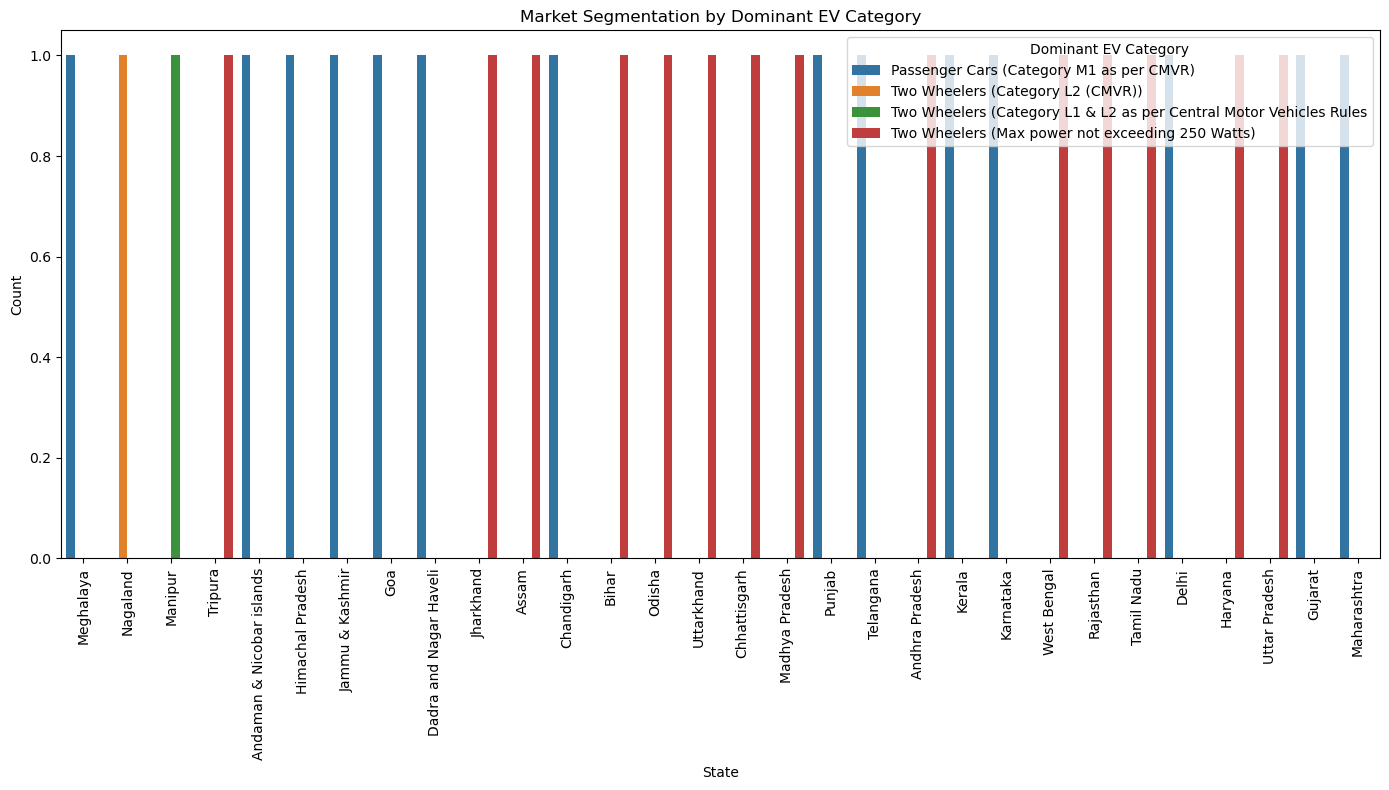

In [33]:
# Market segmentation by state and dominant EV category
df1['Dominant EV Category'] = df1[ev_category_columns].idxmax(axis=1)
plt.figure(figsize=(14, 8))
sns.countplot(data=df1, x='State', hue='Dominant EV Category')
plt.title('Market Segmentation by Dominant EV Category')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Dominant EV Category')
plt.tight_layout()
plt.show()

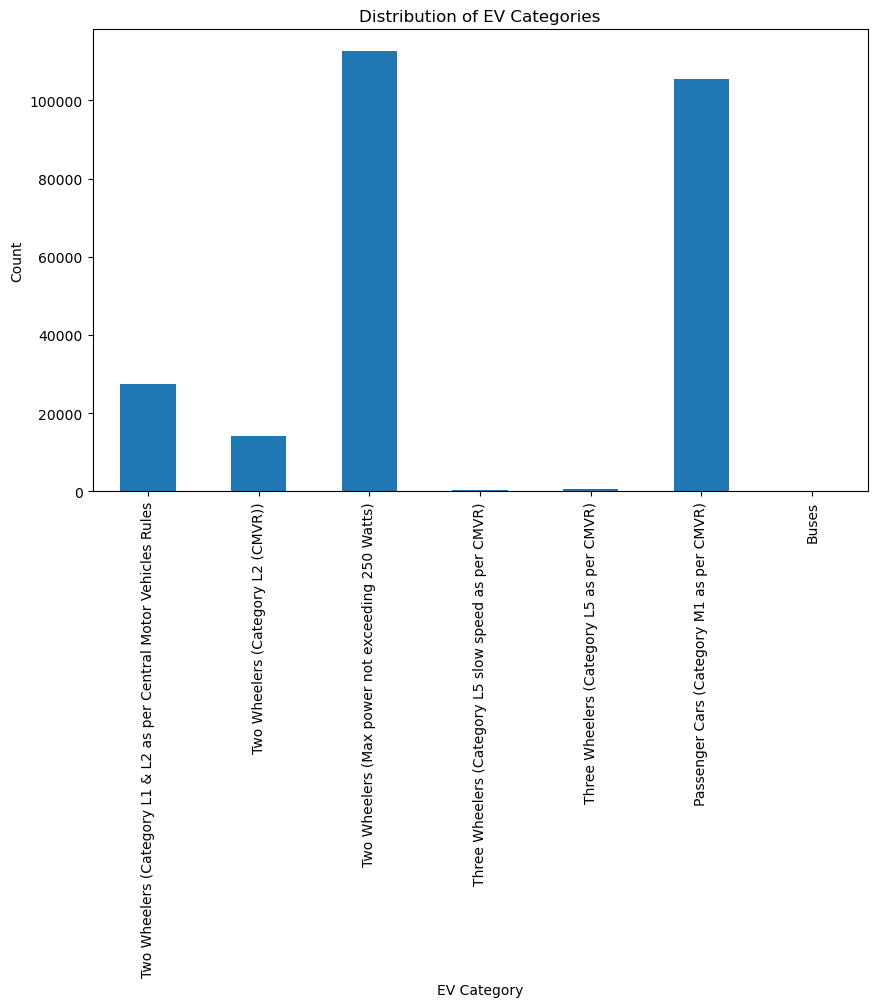

In [91]:
ev_category_columns = ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                       'Two Wheelers (Category L2 (CMVR))',
                       'Two Wheelers (Max power not exceeding 250 Watts)',
                       'Three Wheelers (Category L5 slow speed as per CMVR)',
                       'Three Wheelers (Category L5 as per CMVR)',
                       'Passenger Cars (Category M1 as per CMVR)', 'Buses']
ev_category_distribution = df2[ev_category_columns].sum()
plt.figure(figsize=(10, 6))
ev_category_distribution.plot(kind='bar')
plt.title('Distribution of EV Categories')
plt.xlabel('EV Category')
plt.ylabel('Count')
plt.show()

In [95]:

top_states = {}

# Loop 
for column in df2.columns[2:]:
    sorted_df = df2.sort_values(by=column, ascending=False)
    top_states[column] = sorted_df[['State', column]].head(5)


for category, states_df in top_states.items():
    print(f"Top 5 states for {category}:")
    print(states_df.to_string(index=False))
    print("\n")


Top 5 states for Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules:
        State  Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules
      Gujarat                                                                7182
      Haryana                                                                3162
Uttar Pradesh                                                                2954
  Maharashtra                                                                2630
    Rajasthan                                                                2036


Top 5 states for Two Wheelers (Category L2 (CMVR)):
        State  Two Wheelers (Category L2 (CMVR))
Uttar Pradesh                               2355
  Maharashtra                               2097
      Haryana                               1504
    Rajasthan                               1153
    Karnataka                               1104


Top 5 states for Two Wheelers (Max power not exceeding 250 Watts):
      

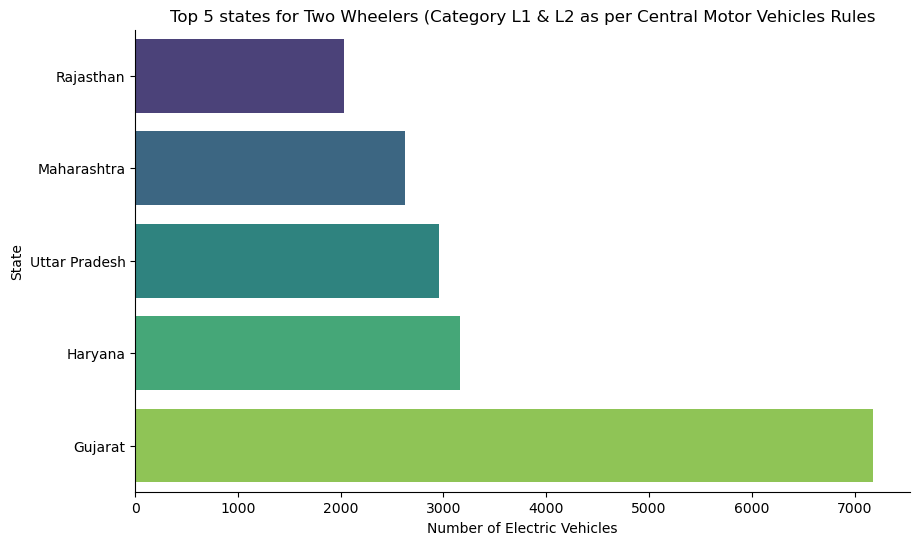

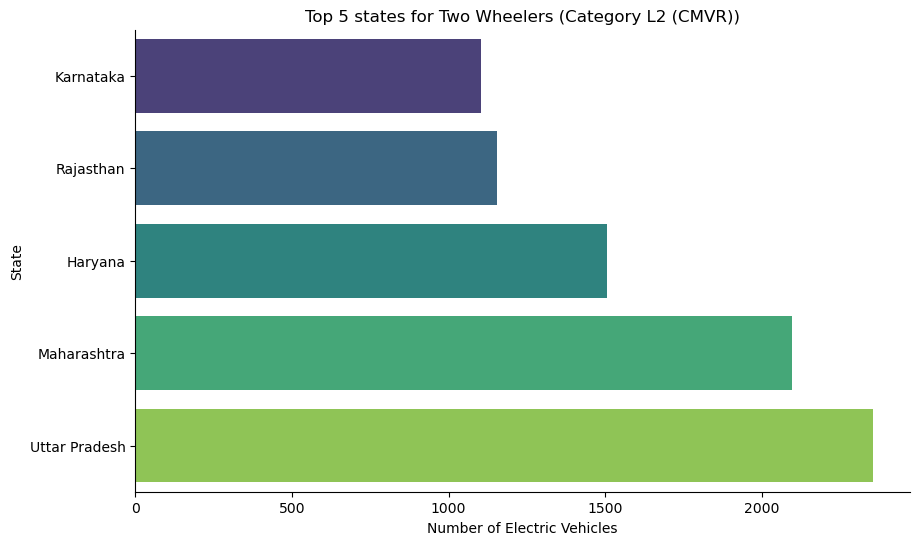

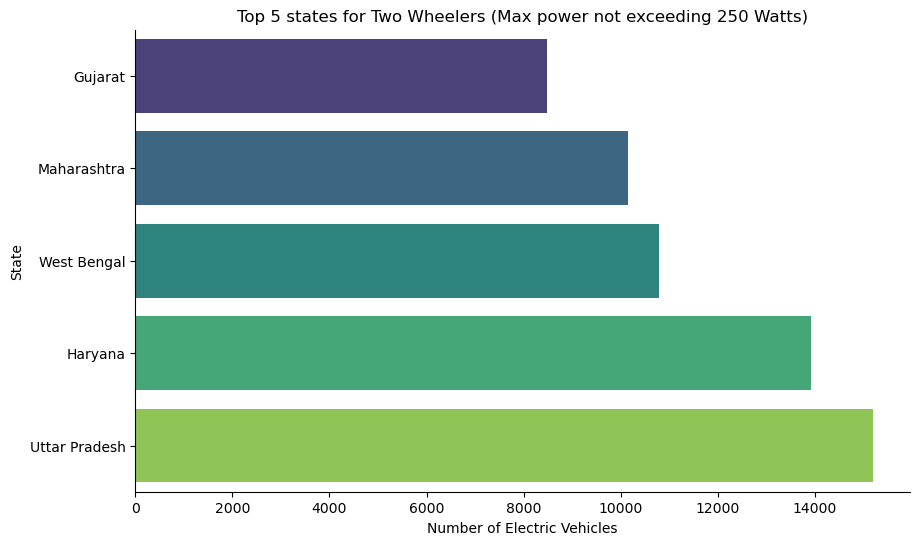

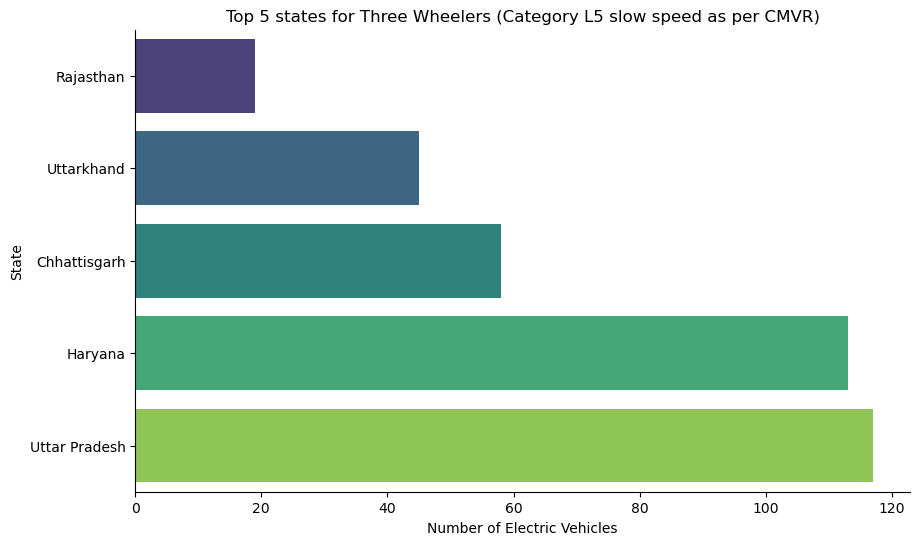

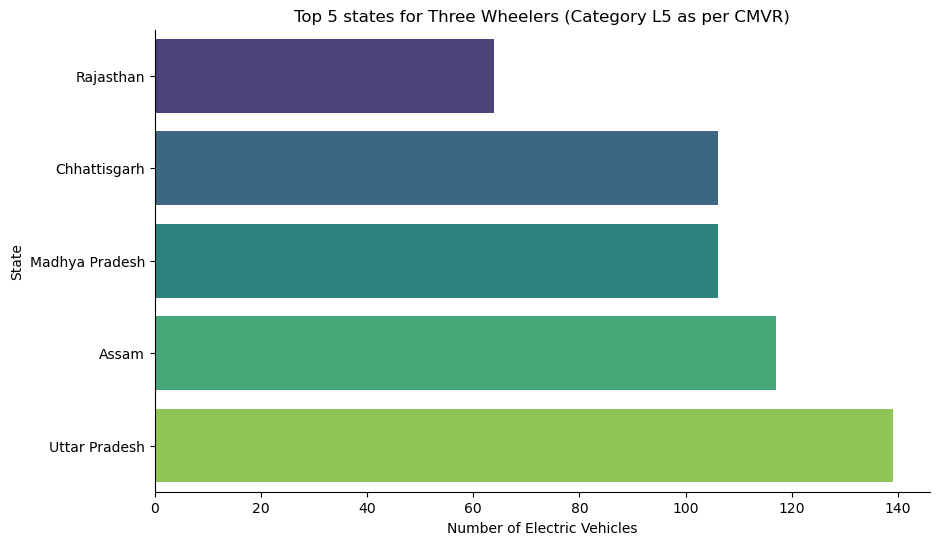

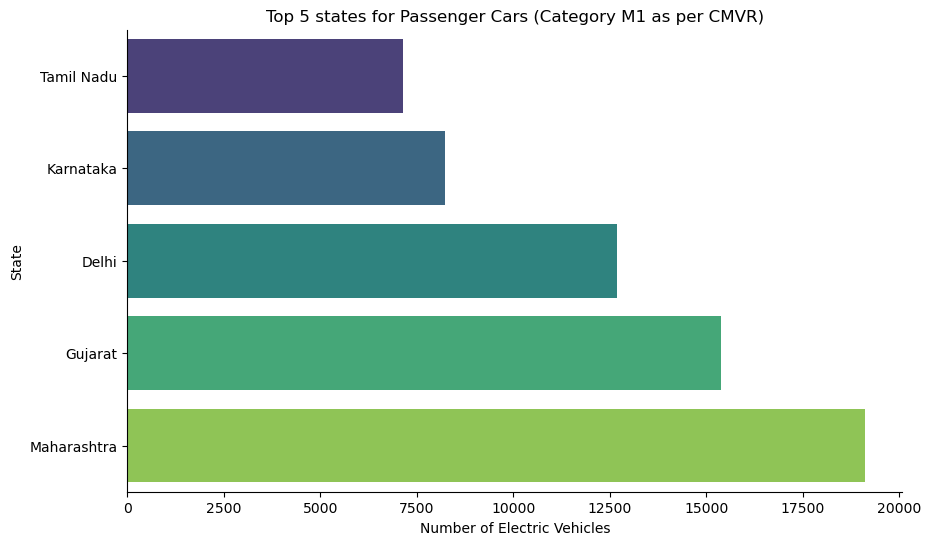

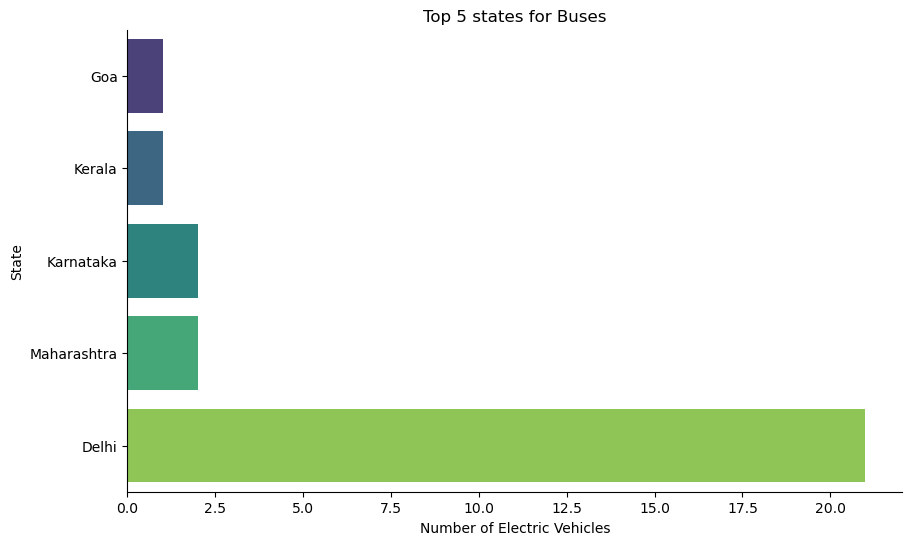

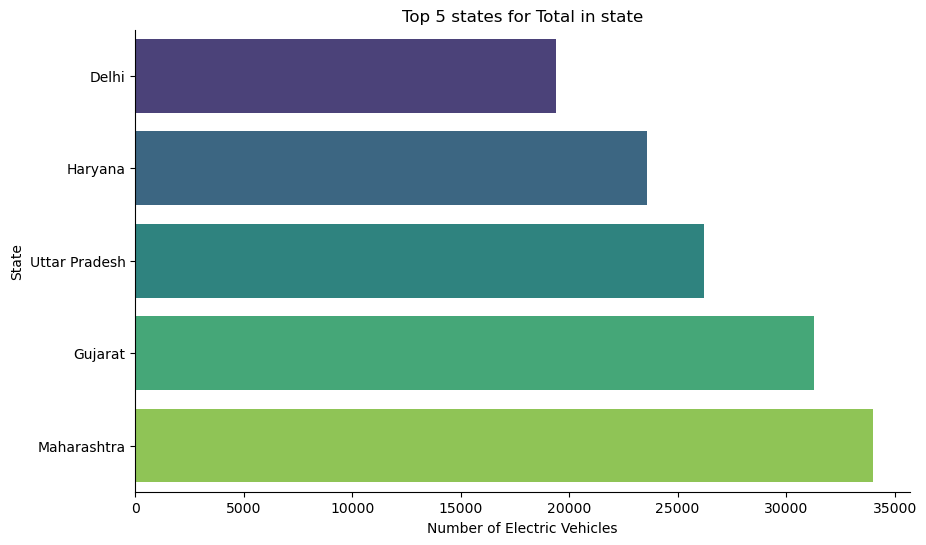

In [97]:
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
          'Two Wheelers (Category L2 (CMVR))',
          'Two Wheelers (Max power not exceeding 250 Watts)',
          'Three Wheelers (Category L5 slow speed as per CMVR)',
          'Three Wheelers (Category L5 as per CMVR)',
          'Passenger Cars (Category M1 as per CMVR)',
          'Buses',
          'Total in state']:
    
    top_states = df2.sort_values(y, ascending=True).tail(5)
  
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=y, y='State', data=top_states, palette='viridis')
    
    plt.title(f"Top 5 states for {y}")
    plt.xlabel('Number of Electric Vehicles')
    plt.ylabel('State')
    sns.despine()
    plt.show()




We can see that Maharashtra has highest number of Electric Vehicles